In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np


class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Third column is for an operation indicator
        self.operation_arr = np.asarray(self.data_info.iloc[:, 2])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open(single_image_name)

        # Check if there is an operation
        some_operation = self.operation_arr[index]
        # If there is an operation
        if some_operation:
            # Do some operation on image
            # ...
            # ...
            pass
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len
if __name__ == "__main__":
    # Define transforms
    
    # Define custom dataset
    train_data = CustomDatasetFromImages("Train0.csv")
    validation_data = CustomDatasetFromImages("Val0.csv")
    
    # Define data loader
#     trainset = torch.utils.data.DataLoader(dataset=train_data,
#                                                     batch_size=100,
#                                                     shuffle=True)
    
#     valset = torch.utils.data.DataLoader(dataset=validation_data,
#                                                     batch_size=100,
#                                                     shuffle=False)
    
    #for images, labels in trainset:
        # Feed the data to the model

In [2]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torch.optim as optim

preprocessFn = transforms.Compose(
    [transforms.Resize(299),  # 1. Resize smallest side to 256.
     transforms.CenterCrop(299), # 2. Crop the center 224x224 pixels.
     transforms.ToTensor(),
     transforms.Normalize(mean = [0.485, 0.456, 0.406],  # normalize.
                          std = [0.229, 0.224, 0.225])])
print(type(train_data))
# img = []
# labellist = []
imgtensor = torch.zeros(1768,3,299,299)
labeltensor = torch.LongTensor(1768,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(train_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensor[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels)
    labeltensor[i,:] = torch.tensor(labels)
    
imgtensorVal = torch.zeros(328,3,299,299)
labeltensorVal = torch.LongTensor(328,1).zero_()
counter = 0
for (i, (inputs, labels)) in enumerate(validation_data):
    counter += 1
    art= transforms.ToPILImage()(inputs)
    imgtensorVal[i,:,:,:] = preprocessFn(art).unsqueeze(0)
#     print(labels) 
    labeltensorVal[i,:] = torch.tensor(labels)
    
print(counter)
# Load the training, and validation datasets.


<class '__main__.CustomDatasetFromImages'>
326


<class 'torch.Tensor'>
torch.Size([3, 299, 299])
Train-epoch 0. Iteration 00010, Avg-Loss: 1.8224, Accuracy: 0.2200
Train-epoch 0. Iteration 00020, Avg-Loss: 1.8154, Accuracy: 0.1900
Train-epoch 0. Iteration 00030, Avg-Loss: 1.7975, Accuracy: 0.1933
Train-epoch 0. Iteration 00040, Avg-Loss: 1.7750, Accuracy: 0.2150
Train-epoch 0. Iteration 00050, Avg-Loss: 1.7676, Accuracy: 0.2120
Train-epoch 0. Iteration 00060, Avg-Loss: 1.7465, Accuracy: 0.2533
Train-epoch 0. Iteration 00070, Avg-Loss: 1.7417, Accuracy: 0.2629
Train-epoch 0. Iteration 00080, Avg-Loss: 1.7350, Accuracy: 0.2725
Train-epoch 0. Iteration 00090, Avg-Loss: 1.7222, Accuracy: 0.2844
Train-epoch 0. Iteration 00100, Avg-Loss: 1.7145, Accuracy: 0.2900
Train-epoch 0. Iteration 00110, Avg-Loss: 1.7076, Accuracy: 0.3036
Train-epoch 0. Iteration 00120, Avg-Loss: 1.6970, Accuracy: 0.3167
Train-epoch 0. Iteration 00130, Avg-Loss: 1.6856, Accuracy: 0.3246
Train-epoch 0. Iteration 00140, Avg-Loss: 1.6683, Accuracy: 0.3429
Train-epoch 0

Train-epoch 3. Iteration 00150, Avg-Loss: 0.7650, Accuracy: 0.7707
Train-epoch 3. Iteration 00160, Avg-Loss: 0.7608, Accuracy: 0.7700
Train-epoch 3. Iteration 00170, Avg-Loss: 0.7493, Accuracy: 0.7753
Train-epoch 3. Iteration 00180, Avg-Loss: 0.7524, Accuracy: 0.7756
Train-epoch 3. Iteration 00190, Avg-Loss: 0.7462, Accuracy: 0.7768
Train-epoch 3. Iteration 00200, Avg-Loss: 0.7312, Accuracy: 0.7850
Train-epoch 3. Iteration 00210, Avg-Loss: 0.7330, Accuracy: 0.7857
Train-epoch 3. Iteration 00220, Avg-Loss: 0.7260, Accuracy: 0.7855
Train-epoch 3. Iteration 00230, Avg-Loss: 0.7267, Accuracy: 0.7835
Train-epoch 3. Iteration 00240, Avg-Loss: 0.7297, Accuracy: 0.7808
Train-epoch 3. Iteration 00250, Avg-Loss: 0.7245, Accuracy: 0.7832
Train-epoch 3. Iteration 00260, Avg-Loss: 0.7263, Accuracy: 0.7815
Train-epoch 3. Iteration 00270, Avg-Loss: 0.7222, Accuracy: 0.7822
Train-epoch 3. Iteration 00280, Avg-Loss: 0.7190, Accuracy: 0.7814
Train-epoch 3. Iteration 00290, Avg-Loss: 0.7122, Accuracy: 0.

Train-epoch 6. Iteration 00290, Avg-Loss: 0.4039, Accuracy: 0.8883
Train-epoch 6. Iteration 00300, Avg-Loss: 0.4045, Accuracy: 0.8887
Train-epoch 6. Iteration 00310, Avg-Loss: 0.4053, Accuracy: 0.8884
Train-epoch 6. Iteration 00320, Avg-Loss: 0.4045, Accuracy: 0.8894
Train-epoch 6. Iteration 00330, Avg-Loss: 0.4027, Accuracy: 0.8909
Train-epoch 6. Iteration 00340, Avg-Loss: 0.4081, Accuracy: 0.8894
Train-epoch 6. Iteration 00350, Avg-Loss: 0.4029, Accuracy: 0.8926
Validation-epoch 6. Avg-Loss: 0.3459, Accuracy: 0.8933
Train-epoch 7. Iteration 00010, Avg-Loss: 0.3536, Accuracy: 0.9000
Train-epoch 7. Iteration 00020, Avg-Loss: 0.4168, Accuracy: 0.8500
Train-epoch 7. Iteration 00030, Avg-Loss: 0.3686, Accuracy: 0.8733
Train-epoch 7. Iteration 00040, Avg-Loss: 0.3489, Accuracy: 0.8900
Train-epoch 7. Iteration 00050, Avg-Loss: 0.3529, Accuracy: 0.8880
Train-epoch 7. Iteration 00060, Avg-Loss: 0.3751, Accuracy: 0.8867
Train-epoch 7. Iteration 00070, Avg-Loss: 0.3560, Accuracy: 0.8943
Train-e

Train-epoch 10. Iteration 00070, Avg-Loss: 0.1853, Accuracy: 0.9629
Train-epoch 10. Iteration 00080, Avg-Loss: 0.1960, Accuracy: 0.9575
Train-epoch 10. Iteration 00090, Avg-Loss: 0.1892, Accuracy: 0.9622
Train-epoch 10. Iteration 00100, Avg-Loss: 0.1847, Accuracy: 0.9640
Train-epoch 10. Iteration 00110, Avg-Loss: 0.1815, Accuracy: 0.9618
Train-epoch 10. Iteration 00120, Avg-Loss: 0.1812, Accuracy: 0.9633
Train-epoch 10. Iteration 00130, Avg-Loss: 0.1792, Accuracy: 0.9631
Train-epoch 10. Iteration 00140, Avg-Loss: 0.1796, Accuracy: 0.9614
Train-epoch 10. Iteration 00150, Avg-Loss: 0.1759, Accuracy: 0.9640
Train-epoch 10. Iteration 00160, Avg-Loss: 0.1766, Accuracy: 0.9637
Train-epoch 10. Iteration 00170, Avg-Loss: 0.1719, Accuracy: 0.9659
Train-epoch 10. Iteration 00180, Avg-Loss: 0.1746, Accuracy: 0.9667
Train-epoch 10. Iteration 00190, Avg-Loss: 0.1779, Accuracy: 0.9642
Train-epoch 10. Iteration 00200, Avg-Loss: 0.1810, Accuracy: 0.9640
Train-epoch 10. Iteration 00210, Avg-Loss: 0.179

Train-epoch 13. Iteration 00200, Avg-Loss: 0.1508, Accuracy: 0.9730
Train-epoch 13. Iteration 00210, Avg-Loss: 0.1479, Accuracy: 0.9733
Train-epoch 13. Iteration 00220, Avg-Loss: 0.1443, Accuracy: 0.9745
Train-epoch 13. Iteration 00230, Avg-Loss: 0.1444, Accuracy: 0.9730
Train-epoch 13. Iteration 00240, Avg-Loss: 0.1444, Accuracy: 0.9717
Train-epoch 13. Iteration 00250, Avg-Loss: 0.1404, Accuracy: 0.9728
Train-epoch 13. Iteration 00260, Avg-Loss: 0.1411, Accuracy: 0.9723
Train-epoch 13. Iteration 00270, Avg-Loss: 0.1394, Accuracy: 0.9726
Train-epoch 13. Iteration 00280, Avg-Loss: 0.1385, Accuracy: 0.9729
Train-epoch 13. Iteration 00290, Avg-Loss: 0.1355, Accuracy: 0.9731
Train-epoch 13. Iteration 00300, Avg-Loss: 0.1344, Accuracy: 0.9733
Train-epoch 13. Iteration 00310, Avg-Loss: 0.1328, Accuracy: 0.9735
Train-epoch 13. Iteration 00320, Avg-Loss: 0.1348, Accuracy: 0.9725
Train-epoch 13. Iteration 00330, Avg-Loss: 0.1360, Accuracy: 0.9727
Train-epoch 13. Iteration 00340, Avg-Loss: 0.134

Train-epoch 16. Iteration 00330, Avg-Loss: 0.0964, Accuracy: 0.9782
Train-epoch 16. Iteration 00340, Avg-Loss: 0.0963, Accuracy: 0.9782
Train-epoch 16. Iteration 00350, Avg-Loss: 0.0948, Accuracy: 0.9789
Validation-epoch 16. Avg-Loss: 0.3037, Accuracy: 0.8933
Train-epoch 17. Iteration 00010, Avg-Loss: 0.0733, Accuracy: 1.0000
Train-epoch 17. Iteration 00020, Avg-Loss: 0.0745, Accuracy: 1.0000
Train-epoch 17. Iteration 00030, Avg-Loss: 0.0720, Accuracy: 0.9933
Train-epoch 17. Iteration 00040, Avg-Loss: 0.1228, Accuracy: 0.9800
Train-epoch 17. Iteration 00050, Avg-Loss: 0.1240, Accuracy: 0.9760
Train-epoch 17. Iteration 00060, Avg-Loss: 0.1136, Accuracy: 0.9767
Train-epoch 17. Iteration 00070, Avg-Loss: 0.1104, Accuracy: 0.9800
Train-epoch 17. Iteration 00080, Avg-Loss: 0.1049, Accuracy: 0.9800
Train-epoch 17. Iteration 00090, Avg-Loss: 0.1036, Accuracy: 0.9822
Train-epoch 17. Iteration 00100, Avg-Loss: 0.1004, Accuracy: 0.9820
Train-epoch 17. Iteration 00110, Avg-Loss: 0.0962, Accuracy:

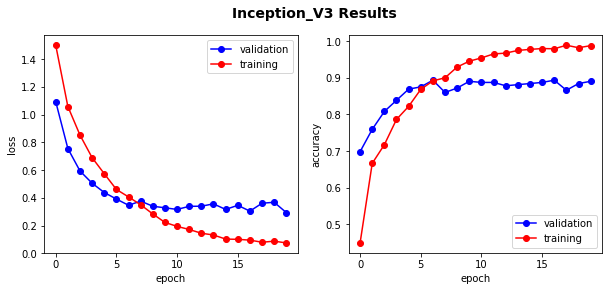

In [5]:
from random import shuffle

inceptionV3 = models.inception_v3(pretrained=True)
inceptionV3.fc = nn.Linear(2048, 6)
inceptionV3.eval()

train_accuracies = []; val_accuracies = []
train_losses = []; val_losses = []

trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)


precision = []
recall = []
y_true = []
y_pred = []
y_score = []
y_allscore = []
predictionstash = []
truthstash = []
score_list = []
label_list = []



fp = [0] * 6
tp = [0] * 6
print(type(imgtensor))
print(imgtensor[0].shape)
listofthelists = []

def train_model(model, loss_fn, batchSize, trainset, valset, optimizer, fatherofthelists):
  ypred = [0]

  # Shuffling is needed in case dataset is not shuffled by default.
  train_loader = torch.utils.data.DataLoader(dataset = trainset,
                                              batch_size = batchSize,
                                              shuffle = True)
#   # We don't need to bach the validation set but let's do it anyway.
  val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
  
  # Define number of epochs.
  N = 20

  # log accuracies and losses.
  train_accuracies = []; val_accuracies = []
  train_losses = []; val_losses = []

  # GPU enabling.
  model = model.cuda()
  loss_fn = loss_fn.cuda()


  # Training loop. Please make sure you understand every single line of code below.
  # Go back to some of the previous steps in this lab if necessary.
  for epoch in range(0, N):
      y_true.append([])
      y_pred.append([])
      y_score.append([])
      y_allscore.append([])
      correct = 0.0
      cum_loss = 0.0
      ytrue = []
      # Make a pass over the training data.
      model.train()
      for (i, (inputs, labels)) in enumerate(train_loader):
          
          inputs = inputs.cuda()
          labels = labels.cuda()
          #print(inputs.shape)
          #trans = transforms.ToPILImage()
          #img = transforms.ToPILImage()(inputs)
          #pil_img = trans(inputs)
          #input_img =  preprocessFn(pil_img).unsqueeze(0)
          # Forward pass. (Prediction stage)
          scores, _ = model(inputs)
#           print(labels)
          loss = loss_fn(scores, labels.view(-1))
          
#           print(labels.view(-1))
#           print(scores.shape)
          # Count how many correct in this batch.
          max_scores, max_labels = scores.max(1)
#           y_true[-1].append(labels.view(-1))
#           y_pred[-1].append(max_labels)
#           y_score[-1].append(max_scores)
#           y_allscore[-1].append(scores)
#           print(max_labels)
#           print(labels.view(-1))
          correct += (max_labels == labels.view(-1)).sum().item()
          cum_loss += loss.item()
          ypred = ypred + max_labels.tolist()
#           print(ypred)
            
        
#           for k in range(6):
#                 for j in range(len(labels.view(-1))):
#                     if labels.view(-1)[j] == k:
#                         tp[k] += (max_labels[j] == labels.view(-1)[j]).sum().item()
#                         fp[k] += (max_labels[j] != labels.view(-1)[j]).sum().item()
                
            
                
                
          # Zero the gradients in the network.
          optimizer.zero_grad()

          #Backward pass. (Gradient computation stage)
          loss.backward()

          # Parameter updates (SGD step) -- if done with torch.optim!
          optimizer.step()
          # Parameter updates (SGD step) -- if done manually!
          # for param in model.parameters():
          #   param.data.add_(-learningRate, param.grad)

          # Logging the current results on training.
          if (i + 1) % 10 == 0:
              print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batchSize)))
      fatherofthelists.append(ypred)
          
      train_accuracies.append(correct / len(trainset))
      train_losses.append(cum_loss / (i + 1))   

      # Make a pass over the validation data.
      correct = 0.0
      cum_loss = 0.0
      model.eval()

      score_list = []
      label_list = []

      for (i, (inputs, labels)) in enumerate(val_loader):
           inputs = inputs.cuda()
           labels = labels.cuda()


#           # Forward pass. (Prediction stage)
           scores = model(inputs)
           cum_loss += loss_fn(scores, labels.view(-1)).item()
           score_list.append(scores.cpu().tolist())
           label_list.append(labels.view(-1).cpu().tolist())
#            # Count how many correct in this batch.
           max_scores, max_labels = scores.max(1)
           correct += (max_labels == labels.view(-1)).sum().item()

      val_accuracies.append(correct / len(valset))
      val_losses.append(cum_loss / (i + 1))
      
      # Logging the current results on validation.
      print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(valset)))
    
  fig = plt.figure(figsize = (10, 4))
  fig.suptitle('Inception_V3 Results', fontsize=14, fontweight='bold')
  plt.subplot(1, 2, 1)
  plt.plot(val_losses, 'bo-', label = 'val-loss')
  plt.plot(train_losses, 'ro-', label = 'train-loss') 
  plt.ylabel('loss')
  plt.xlabel('epoch') 
  plt.legend(['validation', 'training'], loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(val_accuracies, 'bo-', label = 'val-acc')
  plt.plot(train_accuracies, 'ro-', label = 'train-acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['validation', 'training'], loc='lower right')
  plt.show()      


      
model = inceptionV3
loss_fn = nn.CrossEntropyLoss()
    
# Create the model.
import torch.nn.functional as F
# Optimizer.
learningRate = 1e-5
optimizer = optim.Adam(model.parameters(), lr = learningRate)
batchSize = 5

train_model(model, loss_fn, batchSize, trainset, valset, optimizer, listofthelists )



66
5
66
5
6
328
328


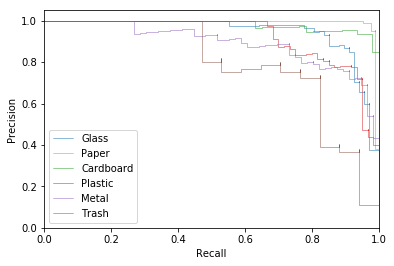

In [6]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]

trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)

def precisionrecall():
    batchSize = 5
    model_load = torch.load("D:/trainedmodel_inceptionV3.pth")
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
#     model_load = model

    model_load.eval()


    score_list = []
    label_list = []
    
    
    for (i, (inputs, labels)) in enumerate(val_loader):
        
        inputs = inputs.cuda()
        labels = labels.cuda()

        #           # Forward pass. (Prediction stage)
        scores = model_load(inputs)
        
        #            # Count how many correct in this batch.
        max_scores, max_labels = scores.max(1)
        
#         stores the scores and labels for computation of the precision recall curve
        score_list.append(scores.cpu().tolist())
        label_list.append(labels.view(-1).cpu().tolist())
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break


    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)
    ypred_list = []
    ytrue_list = []
    print(len(label_list))
    print(len(label_list[0]))
    
    print(len(score_list))
    print(len(score_list[0]))
    print(len(score_list[0][0]))
    
    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    print(len(scoreholder[0]))
    print(len(x))
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-inceptionv3.png', dpi = 720)

    


                          
precisionrecall()

In [7]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]


def precisionrecall():

#     val_loader = torch.utils.data.DataLoader(dataset = valset,
#                                          batch_size = batchSize,
#                                          shuffle = False) # No need.
#     score_list = []
#     label_list = []
    
    
#     for (i, (inputs, labels)) in enumerate(val_loader):
        
#         inputs = inputs.cuda()
#         labels = labels.cuda()

#         #           # Forward pass. (Prediction stage)
#         scores = model(inputs)
        
#         #            # Count how many correct in this batch.
#         max_scores, max_labels = scores.max(1)
        
        #stores the scores and labels for computation of the precision recall curve
#     score_list.append(scores)
#     label_list.append(labels.view(-1))
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
#                     scoreholder[class_counter].append(i[counter][class_counter])
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break

#     print(len(scoreholder[0]))
    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)
    ypred_list = []
    ytrue_list = []
    print(len(label_list))
    print(len(label_list[0]))
    
    print(len(score_list))
    print(len(score_list[0]))
    print(len(score_list[0][0]))
    
    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    print(len(scoreholder[0]))
    print(len(x))
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-InceptionV3.png', dpi = 720)

    


# loss_fn = nn.CrossEntropyLoss()

# train_accuracies = []; val_accuracies = []
# train_losses = []; val_losses = []

# trainset = torch.utils.data.TensorDataset(imgtensor, labeltensor)
# valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)

# model.eval()
# batchSize = 5

precisionrecall()

NameError: name 'score_list' is not defined

In [29]:
import torch.nn.functional as F
batchSize = 5

maxmat = []

valset = torch.utils.data.TensorDataset(imgtensorVal, labeltensorVal)

val_loader = torch.utils.data.DataLoader(dataset = valset,
                                         batch_size = batchSize,
                                         shuffle = False) # No need.
model = torch.load("D:/trainedmodel_inceptionV3.pth")
model= model.cpu()
maxe = [0] * 6
esshal = [0]*6
assmal = [[0]]*6

mine = [1] * 6
estefragh = [0]*6
anmal = [[0]]*6

picmax = [0] * 6
picmin = [0] * 6
piclist = [[] for i in range(6)]
piclistmax = [[] for i in range(6)]
checker = [[] for i in range(6)]

maxbad = [[0] for i in range(6)]
piclistmaxbad = [[] for i in range(6)]
picmaxbad = [0] * 6

for (i, (inputs, labels)) in enumerate(val_loader):

   scores = model(inputs)
   max_scores, max_labels = scores.max(1)
   probs, indices = (-F.softmax(scores, dim = 1).data).sort()
   probsman = F.softmax(scores, dim = 1)
#    print(probsman)
#    print(-probs)
#    print(max_labels)
   for j in range(len(probsman)):
        k = labels.view(-1)[j].item()
        if probsman[j][k] > maxe[k]:
            picmax[k]= inputs[j]
            piclistmax[k].append(inputs[j])
            maxe[k] = probsman[j][k]
            esshal[k] = 5*i + j
            assmal[k].append(5*i + j)
   for j in range(len(max_labels)):
       if max_labels[j] != labels[j]:
            try:
                if probsman[j][0].item() > maxbad[labels[j]][-1]:
                    maxbad[labels[j]].append(probsman[j][0].item())
                    picmaxbad[labels[j]] = inputs[j]
                    piclistmaxbad[labels[j]].append(inputs[j])
            except RuntimeError:
                print(maxbad)
                print(probsman)
                print(probsman[j][0].item())
                print(maxbad[labels[j]][-1])
        
        
   for j in range(len(probsman)):
        k = labels.view(-1)[j].item()
        if probsman[j][k] < mine[k]:
            picmin[k] = inputs[j]
            piclist[k].append(inputs[j])
            checker[k].append(k)
            mine[k] = probsman[j][k]
            estefragh[k] = 5*i + j
            anmal[k].append(5*i + j)
    #         print(probs[j][0])
        
        
        
    
    
print(assmal)
print(esshal)

print(anmal)
print(estefragh)
#           # Forward pass. (Prediction stage)

[[0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213], [0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213], [0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213], [0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213], [0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213], [0, 0, 1, 2, 5, 6, 7, 9, 13, 18, 21, 34, 38, 40, 44, 54, 56, 62, 72, 93, 97, 106, 116, 119, 123, 154, 213]]
[62, 21, 213, 97, 154, 7]
[[0, 0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 17, 20, 31, 32, 37, 48, 53, 63, 109, 110, 136, 188, 198, 318], [0, 0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 17, 20, 31, 32, 37, 48, 53, 63, 109, 110, 136, 188, 198, 318], [0, 0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 17, 20, 31, 32, 37, 48, 53, 63, 109, 110, 136, 188, 198, 318], [0, 0, 1, 2, 3, 6, 8, 9,

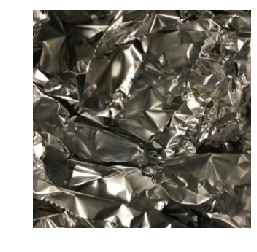

In [5]:
id = 4

picmaxclone = []

for j in range(len(picmax)):
    picmaxclone.append(picmax[j].clone())
    
for t, m, s in zip(picmaxclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
  t.mul_(s).add_(m)
# Re-arrange dimensions so it is height x width x channels.
plt.imshow(picmaxclone[id].cpu().transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off'); 

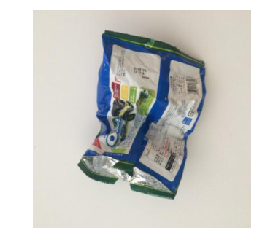

In [6]:
id =3

picminclone = []

for j in range(len(picmin)):
    picminclone.append(picmin[j].clone())
    
for t, m, s in zip(picminclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
  t.mul_(s).add_(m)
# Re-arrange dimensions so it is height x width x channels.
plt.imshow(picminclone[id].cpu().transpose(0,2).transpose(0,1));
plt.grid(False); plt.axis('off'); 

In [ ]:
print(listofthelists)

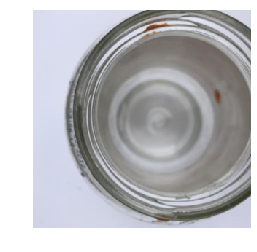

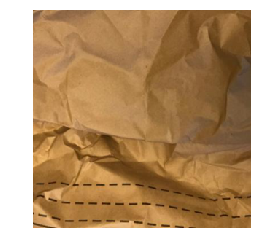

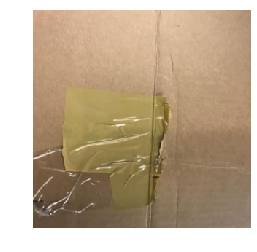

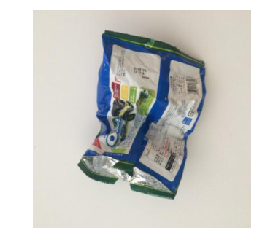

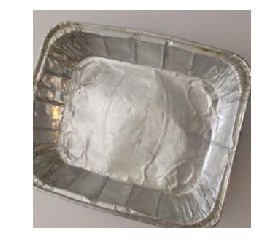

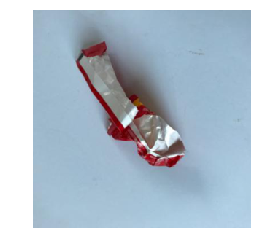

<Figure size 432x288 with 0 Axes>

In [11]:
id = 5
rank = -1
picminclone = []
for bigcounter in range(6):
    id = bigcounter
    # print(piclist)
    for j in range(len(piclist)):
        picminclone.append(piclist[j][rank].clone())

    for t, m, s in zip(picminclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
      t.mul_(s).add_(m)
    # Re-arrange dimensions so it is height x width x channels.
    plt.imshow(picminclone[id].cpu().transpose(0,2).transpose(0,1));
    plt.grid(False); plt.axis('off'); plt.figure()

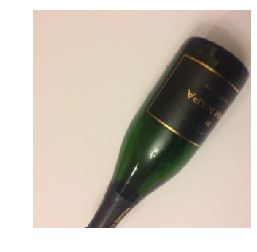

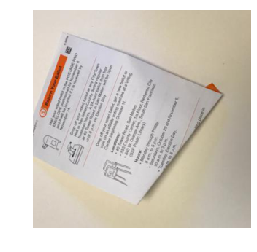

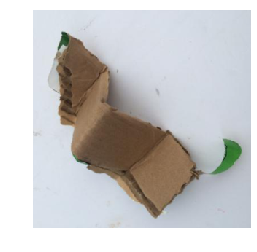

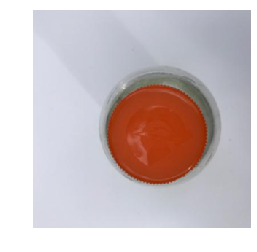

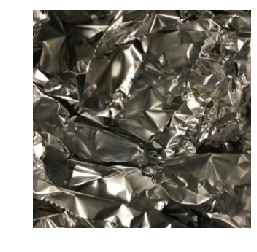

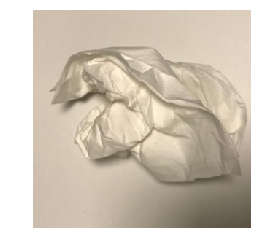

<Figure size 432x288 with 0 Axes>

In [9]:
id = 5
rank = -1
picminclone = []
for bigcounter in range(6):
    id = bigcounter
    # print(piclist)
    for j in range(len(piclistmax)):
        picminclone.append(piclistmax[j][rank].clone())

    for t, m, s in zip(picminclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
      t.mul_(s).add_(m)
    # Re-arrange dimensions so it is height x width x channels.
    plt.imshow(picminclone[id].cpu().transpose(0,2).transpose(0,1));
    plt.grid(False); plt.axis('off'); plt.figure()

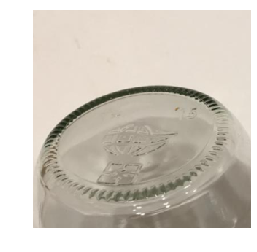

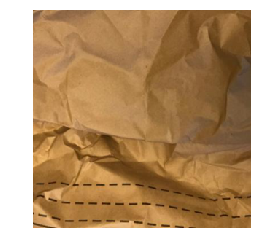

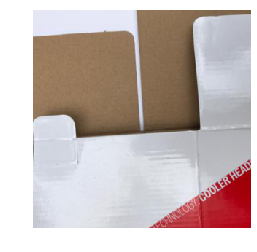

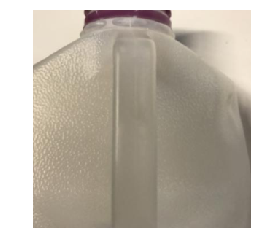

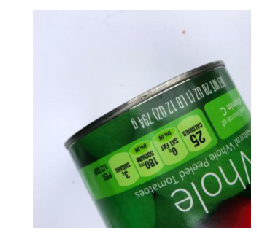

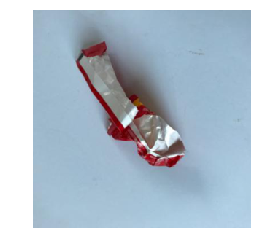

<Figure size 432x288 with 0 Axes>

In [54]:
id = 5
rank = -2
picmaxbadclone = []
for bigcounter in range(0,6):
    id = bigcounter
    # print(piclist)
    for j in range(len(piclistmaxbad)):
        picmaxbadclone.append(piclistmaxbad[j][rank].clone())

    for t, m, s in zip(picmaxbadclone[id], [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):
      t.mul_(s).add_(m)
    # Re-arrange dimensions so it is height x width x channels.
    plt.imshow(picmaxbadclone[id].cpu().transpose(0,2).transpose(0,1));
    plt.grid(False); plt.axis('off'); plt.figure()

In [52]:
print(maxbad[0][-1])
print(maxbad[1][-1])
print(maxbad[2][-1])
print(maxbad[3][-1])
print(maxbad[4][-1])
print(maxbad[5][-1])
print("\n Second Worst \n")
print(maxbad[0][-2])
print(maxbad[1][-2])
print(maxbad[2][-2])
print(maxbad[3][-2])
print(maxbad[4][-2])
print(maxbad[5][-2])


0.49212273955345154
0.0010712652001529932
0.5247868895530701
0.8751973509788513
0.9378021359443665
0.04395226389169693

 Second Worst 

0.48890751600265503
0.00015635915042366832
0.006527374032884836
0.7291922569274902
0.8270201683044434
0.000804096576757729


In [35]:
print(len(piclistmaxbad[0]))



5


In [12]:
print(maxe)
print(mine)

[tensor(1.0000, grad_fn=<SelectBackward>), tensor(1.0000, grad_fn=<SelectBackward>), tensor(1.0000, grad_fn=<SelectBackward>), tensor(1.0000, grad_fn=<SelectBackward>), tensor(1., grad_fn=<SelectBackward>), tensor(1., grad_fn=<SelectBackward>)]
[tensor(0.0123, grad_fn=<SelectBackward>), tensor(0.0004, grad_fn=<SelectBackward>), tensor(0.0054, grad_fn=<SelectBackward>), tensor(0.0268, grad_fn=<SelectBackward>), tensor(0.0132, grad_fn=<SelectBackward>), tensor(0.0002, grad_fn=<SelectBackward>)]


In [ ]:
scoreholder = [[0] for i in range(0,6)]

class_counter = 0
for class_counter in range(0,6):
    for i in y_allscore[-1]:
        for counter in  range(0,len(i)):
            try:
                scoreholder[class_counter].append(i[counter][class_counter].item())
            except IndexError:
                print(i)
                break
        

In [ ]:
#Confusion Matrix Part
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


normalize = True
tensorino = torch.tensor([1])
ytrue_list = []
for element in y_true:
    tensorino = torch.tensor([1])
    for subelement in element:
#         print(subelement)
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ytrue_list.append(tensorino)
    
ypred_list = []    
for element in y_pred:
    tensorino = torch.tensor([1])
    for subelement in element:
#         print(subelement)
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ypred_list.append(tensorino)
    
# print(tensorino)

print(np.asarray(ytrue_list[-1].tolist()))
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]
print(confusion_matrix(ytrue_list[-1], ypred_list[-1]))

# plot_confusion_matrix(np.asarray(ytrue_list[-1].tolist()), np.asarray(ypred_list[-1].tolist()), classes=class_names,
#                       normalize=False)
cm = confusion_matrix(ytrue_list[-1],ypred_list[-1])
piun = [0]*6
for i in range(0, cm.shape[1]):
    piun[i] =  np.ndarray.tolist(np.divide(cm[i],np.sum(cm[i])))

cm = np.asarray(piun)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        xticklabels=class_names, yticklabels=class_names,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.xticks( rotation=30)
print(cm)
plt.imshow(cm, cmap = plt.cm.Blues)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

precision = []
# print(y_score)
## Here we merge the datas of each epoch in tensor form (concantation)
ypred_list = []
# for element in y_score:
#     tensorino = torch.tensor([1])
#     for subelement in element:
#         tensorino = torch.cat((tensorino, subelement.cpu()), 0)
#     ypred_list.append(tensorino)
    
for element in y_true:
    tensorino = torch.tensor([1])
    for subelement in element:
        tensorino = torch.cat((tensorino, subelement.cpu()), 0)
    ytrue_list.append(tensorino)
    
# print(len(ytrue_list[0]))
    
# truelist = [element.item() for element in y_true[1][350].cpu().flatten()]
# predlist = [element.item() for element in y_pred[1][350].cpu().flatten()]

# print(confusion_matrix(truelist, predlist))

# print(len(y_true))
# print(len(y_true[0]))
x = label_binarize(ytrue_list[-1], classes=[0, 1, 2, 3, 4, 5])
# y = label_binarize(ypred_list[-1], classes=[0, 1, 2, 3, 4, 5])

# print(y[0])
# print(len(y[:,1]))
precision= [0]*6
recall = [0]*6
average_precision = [0] * 6
# print(np.asarray(scoreholder[0]))
for i in range(0,6):
    precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

    average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))

# print(len(precision[0]))    
# print(precision)
# print(recall)
# print(average_precision)


# print(x)
# print(y)

# print(recall_score(truelist, predlist, average=None))
# print(precision_score(truelist, predlist, average=None))


ardor = []
ardor_2 = []
precision_list = []

for i in precision:
    for j in i:
        ardor.append(j)
        
for i in recall:
    for j in i:
        ardor_2.append(j) 
        
for i in average_precision:
        precision_list.append(j)  
        
# print(ardor)
for i in range(0,6):
    plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
plt.legend()
# plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision[1]))
plt.savefig('precision-recall.png', dpi = 720)

In [ ]:
y_pred[1][350].cpu()

In [ ]:
truelist


In [ ]:
y_true[1][350].cpu()

In [ ]:
y[:, 1]

In [ ]:
x

In [ ]:
torch.save(model, "D:/trainedmodel_inceptionV3.pth")

66
5
66
5
6
328
328


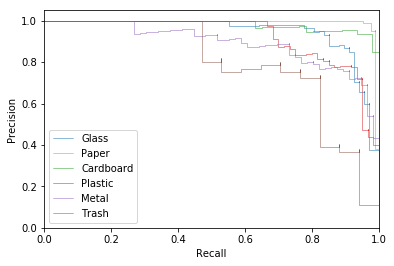

In [6]:
#Confusion Matrix Part
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, io, requests, string
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pandas as pd
import numpy as np

class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]

score_list = []
label_list = []
ypred_list = []
y_pred = []
ytrue_list = []

def precisionrecall():
    batchSize = 5
    
    val_loader = torch.utils.data.DataLoader(dataset = valset,
                                             batch_size = batchSize,
                                             shuffle = False) # No need.
    model_load = model
    model_load = torch.load("D:/trainedmodel_inceptionV3.pth")
    model_load.eval()



    
    
    for (i, (inputs, labels)) in enumerate(val_loader):
        
        inputs = inputs.cuda()
        labels = labels.cuda()

        #           # Forward pass. (Prediction stage)
        scores = model_load(inputs)
        
        #            # Count how many correct in this batch.
        max_scores, max_labels = scores.max(1)
        y_pred.append(max_labels.cpu().tolist())

#         stores the scores and labels for computation of the precision recall curve
        score_list.append(scores.cpu().tolist())
        label_list.append(labels.view(-1).cpu().tolist())
        
    scoreholder = [[] for i in range(0,6)]

    class_counter = 0
    
    for class_counter in range(0,6):
        for i in score_list:
            for counter in  range(0,len(i)):
                try:
                    scoreholder[class_counter].append(i[counter][class_counter])
                except IndexError:
                    print(i)
                    break
                    
    for i in y_pred:
        for counter in  i:
            ypred_list.append(counter)
               


    precision = []

    ## Here we merge the datas of each epoch in tensor form (concantation)

    print(len(label_list))
    print(len(label_list[0]))
    
    print(len(score_list))
    print(len(score_list[0]))
    print(len(score_list[0][0]))
    
    for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    x = label_binarize(ytrue_list, classes=[0, 1, 2, 3, 4, 5])
    
    print(len(scoreholder[0]))
    print(len(x))
    
    
    precision= [0]*6
    recall = [0]*6
    average_precision = [0] * 6
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(x[:, i], np.asarray(scoreholder[i]))

        average_precision[i] = average_precision_score(x[:, i], np.asarray(scoreholder[i]))


    for i in range(0,6):
        plt.step(recall[i], precision[i], label= class_names[i], linewidth = 0.5)
    plt.legend()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#     plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#               average_precision[1]))
    plt.savefig('precision-recall-inceptionv3.png', dpi = 720)

    


                          
precisionrecall()

[2 3 0 0 0 2 4 5 0 1 2 4 1 0 0 0 1 5 3 2 3 1 0 3 0 3 3 4 1 1 0 1 2 1 0 3 3
 4 4 4 3 1 2 0 4 4 2 0 5 1 1 1 2 2 3 0 3 2 4 4 0 4 0 5 0 2 0 2 1 3 2 5 4 1
 1 1 1 0 1 4 0 2 3 4 2 0 3 1 0 1 0 1 3 2 4 1 0 3 1 1 2 0 2 3 3 0 4 3 2 3 1
 0 3 2 3 3 2 2 4 4 0 2 2 2 1 4 0 1 3 0 4 3 0 1 1 3 5 3 3 1 0 3 1 3 3 0 4 0
 1 0 0 1 4 3 4 3 0 1 0 0 3 2 0 3 3 4 2 3 5 0 1 0 3 0 1 3 3 1 0 5 2 1 1 2 0
 1 5 1 4 2 1 1 2 4 1 4 3 1 4 1 3 1 4 2 1 0 1 4 1 4 2 2 1 2 3 4 5 1 1 3 2 0
 5 0 1 1 2 1 1 1 3 0 3 0 5 1 1 3 2 0 0 0 1 0 0 0 2 1 4 4 1 0 0 5 1 5 1 1 5
 4 2 1 1 4 1 2 3 0 4 1 4 3 3 4 5 2 4 3 5 1 1 1 4 3 4 4 1 2 4 2 0 3 3 4 3 1
 4 1 1 4 4 0 4 3 4 3 4 4 4 4 1 1 3 1 0 1 3 0 4 2 0 4 2 3 0 1 0 0]
[[56  0  0  3  8  0]
 [ 0 79  0  0  0  3]
 [ 1  1 43  1  0  0]
 [ 4  1  0 53  1  1]
 [ 6  1  0  3 46  0]
 [ 0  0  1  1  2 13]]
[[0.8358209  0.         0.         0.04477612 0.11940299 0.        ]
 [0.         0.96341463 0.         0.         0.         0.03658537]
 [0.02173913 0.02173913 0.93478261 0.02173913 0.         0.        ]


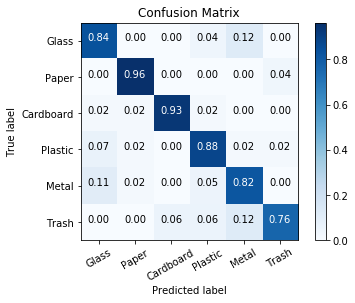

In [7]:
#Confusion Matrix Part
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


normalize = True
tensorino = torch.tensor([1])
ytrue_list = []

for element in label_list:
        for subelement in element:

            ytrue_list.append(subelement)

    
# print(tensorino)

print(np.asarray(ytrue_list))
class_names = ['Glass', 'Paper', 'Cardboard', 'Plastic', 'Metal', 'Trash' ]
print(confusion_matrix(ytrue_list, ypred_list))

# plot_confusion_matrix(np.asarray(ytrue_list[-1].tolist()), np.asarray(ypred_list[-1].tolist()), classes=class_names,
#                       normalize=False)
cm = confusion_matrix(ytrue_list,ypred_list)
piun = [0]*6
for i in range(0, cm.shape[1]):
    piun[i] =  np.ndarray.tolist(np.divide(cm[i],np.sum(cm[i])))

cm = np.asarray(piun)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
        xticklabels=class_names, yticklabels=class_names,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')
thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
plt.xticks( rotation=30)
print(cm)
plt.imshow(cm, cmap = plt.cm.Blues)
